# Simulating Stellar Evolution
## David Blumenstiel
## DATA 604 Final Project









# What's Stellar Evolution?

## Stellar evolution is the change a star undergoes over its lifetime.  Stars start out as loose clouds of gas, which eventually condense and form what you think of as stars.  Stars also go through changes as they burn their fuel, often becoming different types of stars, or even other objects such as black holes.  

## As there really isn't a whole lot of astronomical data concerning the formation and lifetime of stars (in-case you didn't already know, it takes a while), we don't know what the composition of the universe (or smaller sections thereof) will actually look like.  However, there are lots of theories about how things form and behave; a good situation for simulation.
 
## The goal of this simulation is to take in parameters concerning stellar evolution and model the composition of the universe (or some subsection of it) over a period of time.  It takes in parameters regarding the original composition of stars, theoretical lifespans, starting ages, and several probabilities regarding the different evolutionary paths certain stars can take.

## This is specifically designed to accommodate changes to the parameters by which the simulation will progress.  One can put in any number of different starting formations, or use different lifespans for stars, or change the proportions at which certain objects form.  Astrophysics is a highly theoretical field, and this provides a tool to test out alterations in theory.


# How's the Simulation Work?

## Given the topic, this is a fairly simple simulation, which takes stars or related stellar objects, and determines whether or not they change into anything.  Below is a flow chart by which stellar evolution in this simulation progresses
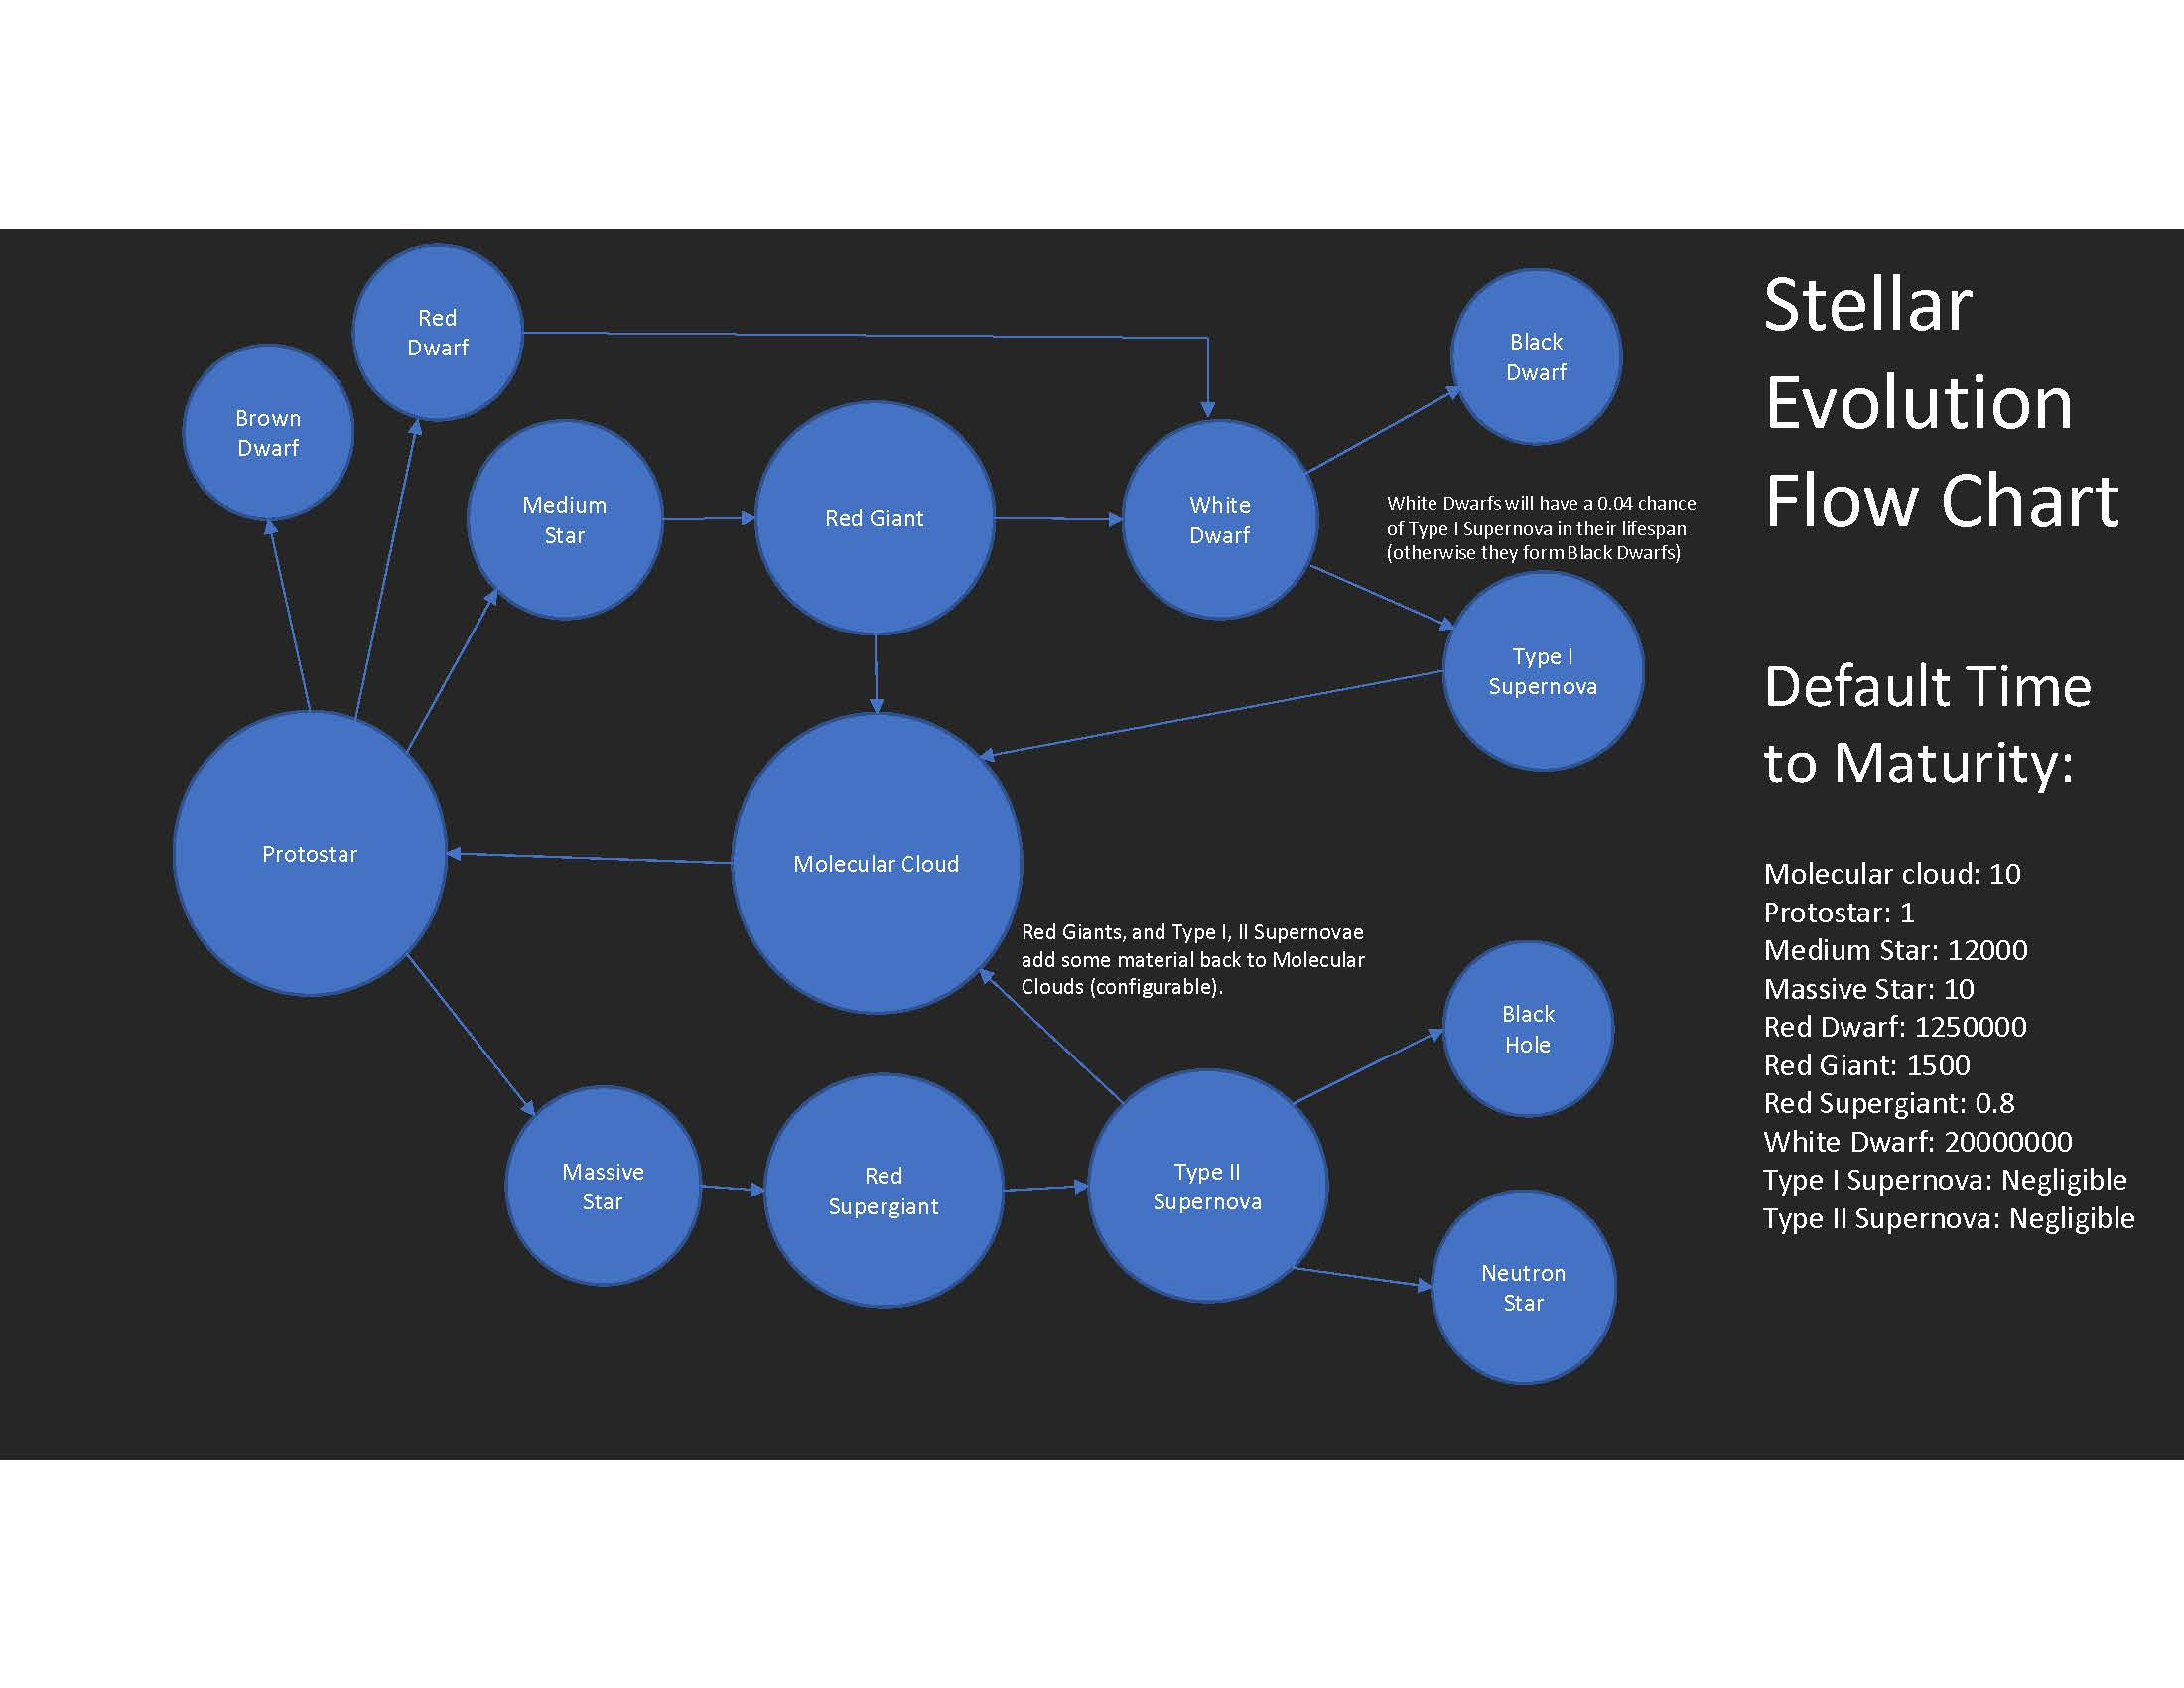
## As stars age, the likelihood that they progress to the next stage of their stellar evolution increases.  The probability of progression is exponentially higher for stars near the end of their lifespan than those at the middle or beginning.

## The simulation will calculate the odds of an event occurring for every star individually.  This allows for a fair amount of resolution.  Age, however, is averaged between all stars of a type, and adjusted accordingly when new stars of that type are created.

## When an evolutionary track leads two or more directions, there are associated probabilities by which stars will be assigned to different tracks.  E.g., the default probability of a Type II Supernova resulting in a Black Hole is 85%, while the probability of it resulting in a Neutron Star is 15%.  These are configurable.

## When Red Giants, Red Supergiants, or Type I Supernovae progress, some 'Molecular Cloud' is added back.  The amount is configurable.



# Disclaimer:

## It should be noted that this is a vast simplification.  In reality, there are many more different types of stars, all of which behave differently depending on weight and composition/age.  What I've done here is lump similar star types into big groups.  E.g., stars that will later form Red Giants are 'Medium Stars', all Type II Supernova are the same, etc.

## Type I Supernovae, in reality, are caused by a White Dwarf colliding with any object heavy enough to push it over its threshold.  This simulation only considers White Dwarfs colliding with other White Dwarfs, for simplicity.  For that matter, other stars can also collide with each other, which this simulation ignores.

## The various default parameters, such as expected lifespans, within this simulation are imperfect.  There may be better one’s unknown to me, but they are all highly speculative due to the nature of the topic.  

## This simulation also assumes that Black Holes, Black Dwarfs, Brown Dwarfs, and Neutron Stars stick around forever.  While forever is likely a pretty close guess, no one really knows; In reality they can also collide.  It's also debatable whether Brown Dwarfs actually stay that way,


# The Simulation:

#### Or rather the inner workings it.  Run this stuff first.

In [16]:
#Imports
import numpy as np
from modsim import *
import matplotlib.pyplot as plt
from math import floor, e


In [64]:
# This function determines how the molecular clouds behave.  Similar functions exist for the rest of the stellar objects, albeit with slight differences.

def molecularCloud(objects, params):

    
    Dt = params.time_increment                  # The change in time
    num_objects = objects.molecular_cloud       # The curent number of objects
    age = params.molecular_cloud_age            # The average age of all molecular clouds 
    lifespan = params.molecular_cloud_lifespan  # The max lifespan of a molecular cloud
    
    age += Dt     #Increases the average age of the object by the change in time
    
    if num_objects >= 1:    #molecularCloud is the only function that will need to deal with fractions as the number of objects.  This exception is nessicary to prevent negatives.
        
        for i in range(floor(num_objects)):

            if flip((age/lifespan)**8):  #So, this exponent is a bit of a guess.  My intent is to make the probability of advance dramatically increase as age approaches lifespan

                objects.protostar += 1         #One more protostar, one less cloud
                objects.count_protostar += 1   #Tallys the count of all protostars formed
                objects.molecular_cloud -= 1
                

                params.protostar_age = params.protostar_age * (objects.protostar - 1)/objects.protostar #adjusts age of the forhcoming object to reflect the new instance added

        if num_objects == 0:  #Resets the age to zero if there are no clouds left
            age = 0

        params.molecular_cloud_age = age  
        
        


In [3]:
def protostar(objects, params):
    
    Dt = params.time_increment
    num_objects = objects.protostar
    age = params.protostar_age
    lifespan = params.protostar_lifespan
    
    
    age += Dt
    
    for i in range(int(round(num_objects, 0))):
        
        if flip((age/lifespan)**8):
            
            objects.protostar -= 1
            
            #If a transformation occurs, this will randomy decide between which star is formed based on preset probabilities
            #This chooses the evolutionary path
            probabilities = [params.p_protostar_to_red_dwarf, params.p_protostar_to_med_star, params.p_protostar_to_massive_star, params.p_protostar_to_brown_dwarf]
            formation = np.random.choice(["RD","MED","MAS","BD"], p=probabilities)
            
            if formation == "RD":
                objects.red_dwarf +=1
                objects.count_red_dwarf += 1
                params.red_dwarf_age = params.red_dwarf_age * (objects.red_dwarf - 1)/objects.red_dwarf
            
            elif formation == "MED":
                objects.med_star +=1
                objects.count_med_star += 1
                params.med_star_age = params.med_star_age * (objects.med_star - 1)/objects.med_star
        
            elif formation == "MAS":
                objects.massive_star +=1
                objects.count_massive_star += 1
                params.massive_star_age = params.massive_star_age * (objects.massive_star - 1)/objects.massive_star
                
            elif formation == "BD":
                objects.brown_dwarf +=1  
                objects.count_brown_dwarf += 1
                params.brown_dwarf_age = params.brown_dwarf_age * (objects.brown_dwarf - 1)/objects.brown_dwarf
        
            
        
            
            
    if num_objects == 0:
        age = 0
        
    params.protostar_age = age
    


In [4]:
def redDwarf(objects, params):

    
    Dt = params.time_increment
    num_objects = objects.red_dwarf
    age = params.red_dwarf_age
    lifespan = params.red_dwarf_lifespan
    
    
    age += Dt
    
    for i in range(int(round(num_objects, 0))):
        
        if flip((age/lifespan)**8):
        
            objects.white_dwarf += 1  #Yeah, I skipped blue dwarf. 
            objects.count_white_dwarf += 1
            objects.red_dwarf -= 1
            
            params.white_dwarf_age = params.white_dwarf_age * (objects.white_dwarf - 1)/objects.white_dwarf
            
    if num_objects == 0:
        age = 0
        
    params.red_dwarf_age = age
    


In [5]:
def medStar(objects, params):

    
    Dt = params.time_increment
    num_objects = objects.med_star
    age = params.med_star_age
    lifespan = params.med_star_lifespan
    
    
    age += Dt
    
    for i in range(int(round(num_objects, 0))):
        
        if flip((age/lifespan)**8):
        
            objects.red_giant += 1
            objects.count_red_giant += 1
            objects.med_star -= 1
       
            params.red_giant_age = params.red_giant_age * (objects.red_giant - 1)/objects.red_giant
            
    if num_objects == 0:
        age = 0
        
    params.med_star_age = age
    


In [6]:
def redGiant(objects, params):

    
    Dt = params.time_increment
    num_objects = objects.red_giant
    age = params.red_giant_age
    lifespan = params.red_giant_lifespan
    
    
    age += Dt
    
    for i in range(int(round(num_objects, 0))):
        
        if flip((age/lifespan)**8):
        
            objects.white_dwarf += 1
            objects.count_white_dwarf += 1
            objects.molecular_cloud += params.red_giant_recycle   #Will determine how much of the leftovers go back towards forming new stars; find actual number?
            objects.count_molecular_cloud += params.red_giant_recycle
            objects.red_giant -= 1
            
            params.white_dwarf_age = params.white_dwarf_age * (objects.white_dwarf - 1)/objects.white_dwarf
            params.molecular_cloud_age = params.molecular_cloud_age * (objects.molecular_cloud - params.red_giant_recycle)/objects.molecular_cloud

    if num_objects == 0:
        age = 0
        
    params.red_giant_age = age
    


In [7]:
def whiteDwarf(objects, params):

    
    Dt = params.time_increment
    num_objects = objects.white_dwarf
    age = params.white_dwarf_age
    lifespan = params.white_dwarf_lifespan
    age += Dt
    
    for i in range(int(round(num_objects, 0))):
        
        if flip((age/lifespan)**8):
        
            objects.black_dwarf += 1
            objects.count_black_dwarf += 1  #Redundant, but for consistancies sake
            objects.white_dwarf -= 1
           
            params.black_dwarf_age = params.black_dwarf_age * (objects.black_dwarf - 1)/objects.black_dwarf
            
            
        elif flip(params.p_white_dwarf_collision * min([Dt,lifespan])/lifespan):  #This is simplified collision.  p_white_dwarf_collision is basically the probability of a collision over the lifetime of an white_dwarf.    
                                       #If Dt is greater than the lifespan (and if it is, you should really consider a shorter time incrememnt) then the chance of collision caps out at the probability of a collision
                                       #I tried more complex, resolute ways of calculating this, but they all took forever to run.  This works just as well (you're welcome)
            objects.T1_supernova += 1  
            objects.count_T1_supernova += 1
            objects.white_dwarf -= 2   #In reality, other white dwarfs can collide with other things resulting in T-1 supernovae, but this is a simplification
           
            params.T1_supernova_age = params.T1_supernova_age * (objects.T1_supernova - 1)/objects.T1_supernova   
            
            
    if num_objects == 0:
        age = 0
        
    params.white_dwarf_age = age
    

In [8]:
def massiveStar(objects, params):

    
    Dt = params.time_increment
    num_objects = objects.massive_star
    age = params.massive_star_age
    lifespan = params.massive_star_lifespan
    
    
    age += Dt
    
    for i in range(int(round(num_objects, 0))):
        
        if flip((age/lifespan)**8):
        
            objects.red_supergiant += 1
            objects.count_red_supergiant += 1
            objects.massive_star -= 1
           
            params.red_supergiant_age = params.red_supergiant_age * (objects.red_supergiant - 1)/objects.red_supergiant

    if num_objects == 0:
        age = 0
        
    params.massive_star_age = age
    

In [9]:
def redSupergiant(objects, params):

    
    Dt = params.time_increment
    num_objects = objects.red_supergiant
    age = params.red_supergiant_age
    lifespan = params.red_supergiant_lifespan
    
    
    age += Dt
    
    for i in range(int(round(num_objects, 0))):
        
        if flip((age/lifespan)**8):
        
            objects.T2_supernova += 1
            objects.count_T2_supernova += 1
            objects.red_supergiant -= 1
            
            params.T2_supernova_age = params.T2_supernova_age * (objects.T2_supernova - 1)/objects.T2_supernova
            
    if num_objects == 0:
        age = 0
        
    params.red_supergiant_age = age


In [10]:
def T2Supernova(objects, params):

    
    Dt = params.time_increment
    num_objects = objects.T2_supernova
    age = params.T2_supernova_age
    lifespan = params.T2_supernova_lifespan
    
    
    age += Dt
    
    for i in range(int(round(num_objects, 0))):
        
        if flip((age/lifespan)**8):
            
            objects.T2_supernova -= 1
            
            objects.molecular_cloud += params.T2_recycle #Adds some remnants back to molecular cloud for additional star formation
            objects.count_molecular_cloud += params.T2_recycle
            params.molecular_cloud_age = params.molecular_cloud_age * (objects.molecular_cloud - params.T2_recycle)/objects.molecular_cloud
            
            if flip(params.p_T2_to_black_hole):  #Decides whether or not a T2-supernova forms a black hole, or a neutron star
        
                objects.black_hole += 1
                objects.count_black_hole += 1
                params.black_hole_age = params.black_hole_age * (objects.black_hole - 1)/objects.black_hole
            
            else:
                
                objects.neutron_star += 1
                objects.count_neutron_star += 1
                params.neutron_star_age = params.neutron_star_age * (objects.neutron_star - 1)/objects.neutron_star
                

    if num_objects == 0:
        age = 0
        
    params.T2_supernova_age = age
    

In [11]:
def T1Supernova(objects, params):

    
    Dt = params.time_increment
    num_objects = objects.T1_supernova
    age = params.T1_supernova_age
    lifespan = params.T1_supernova_lifespan
    
    
    age += Dt
    
    for i in range(int(round(num_objects, 0))):
        
        if flip((age/lifespan)**8):
        
            objects.molecular_cloud += params.T1_recycle
            objects.count_molecular_cloud += params.T1_recycle
            objects.T1_supernova -= 1
            
            params.molecular_cloud_age = params.molecular_cloud_age * (objects.molecular_cloud -params.T1_recycle)/objects.molecular_cloud
            
            
    if num_objects == 0:
        age = 0
        
    params.T1_supernova_age = age


In [12]:
#This is the function that will call the different advance functions

def step(objects, params):
    
    params.t += params.time_increment
    
    #This is specifically ordered from last in the evolutionary chain to first
    #This limits any compounding that might otherwise occur when calling a function whose variabes were affected by the function before it
    #Compounding can still happen via molecularCloud, as it will take input from the supernovae and red giant functions
    T1Supernova(objects, params)
    #collide(objects,params)          # An old attempt at adding a collision function.  Was too computer intensive
    T2Supernova(objects,params)
    redSupergiant(objects,params)
    massiveStar(objects,params)
    whiteDwarf(objects,params)
    redGiant(objects, params)
    medStar(objects, params)
    redDwarf(objects, params)
    protostar(objects, params)
    molecularCloud(objects, params)
    
    

In [44]:
def simulate(objects, params, timespan, time_increment, xlog = False, ylog = False): 
   
    
    params.time_increment = time_increment #Time is referenced in millions of years
    t = timespan/params.time_increment #The number of iterations the simulation runs through
    molecular_cloud = []
    protostar = []
    brown_dwarf = []
    red_dwarf = []
    med_star = []
    massive_star = []
    red_giant = []
    red_supergiant = []
    white_dwarf = []
    T1_supernova = []
    T2_supernova = []
    black_hole = []
    neutron_star = []
    black_dwarf = []
      
    time = []
    
    print("This simulation will run " + str(t) + " iterations.  If it's taking too long, reduce the timespan or increase the time increment")
    for i in range(int(t)):
        
        loading = "Running: " + str(int(round(i/t*100,0))) + "%"   #Adds a little loading message so you know if you've signed up to wait forever or not
        print('{}\r'.format(loading), end="")
        
        step(objects, params)
        
        molecular_cloud.append(objects.molecular_cloud)
        protostar.append(objects.protostar)
        brown_dwarf.append(objects.brown_dwarf)
        red_dwarf.append(objects.red_dwarf)
        med_star.append(objects.med_star)
        massive_star.append(objects.massive_star)
        red_giant.append(objects.red_giant)
        red_supergiant.append(objects.red_supergiant)
        white_dwarf.append(objects.white_dwarf)
        T1_supernova.append(objects.T1_supernova)
        T2_supernova.append(objects.T2_supernova)
        black_hole.append(objects.black_hole)
        neutron_star.append(objects.neutron_star)
        black_dwarf.append(objects.black_dwarf)
        
        #There's a problem with additional probability granted to stars evolving as the number of iterations goes up.  There may be a variable (below) to multiply the x axis by to compensate, but I haven't found it yet
        #timefix = 1/(1+np.exp(-t/(2300))) # A modifyer which corrects for additional probability of events occuring with more iterations.  This one was hard to come up with, (Jit Seneviratne and Manolis Manoli helped a bunch)
        timefix = 1
        time.append(i * time_increment * timefix)
        
    plt.plot(time, molecular_cloud, 'tab:cyan', label= "Molecular Clouds")
    plt.plot(time, protostar, 'tab:purple', label="Protostars")
    plt.plot(time, brown_dwarf, 'tab:brown', label="Brown Dwarfs")
    plt.plot(time, red_dwarf, 'tab:pink', label="Red Dwarfs")
    plt.plot(time, med_star, 'y', label="Medium Stars")
    plt.plot(time, massive_star, 'b', label="Massive Stars")
    plt.plot(time, red_giant, 'tab:orange', label="Red Giants")
    plt.plot(time, red_supergiant, 'r', label="Red Supergiants")
    plt.plot(time, white_dwarf, 'tab:grey', label="White Dwarfs")
    plt.plot(time, T1_supernova, 'g', label="Type I Supernova")
    plt.plot(time, T2_supernova, 'springgreen', label="Type II Supernova")
    plt.plot(time, black_hole, 'darkblue', label="Black Holes")
    plt.plot(time, neutron_star, 'tab:olive',label="Neutron Stars")
    plt.plot(time, black_dwarf, 'k',label="Black Dwarfs")

    plt.legend(loc = 'upper right')
    plt.rcParams["figure.figsize"] = (20,10)
    plt.xlabel('Time (Ma)')
    plt.ylabel('Number of Stellar Objects')
    plt.title('Stellar Objects over Time')
    
    if xlog == True:
        plt.xscale('log')
        
    if ylog == True:
        plt.yscale('log')
    
    
    plt.show()
 
    

# Now, Let's Simulate Something

### Below, you will find the default settings for the simulation, along with our default galaxy (or universe; whatever units you like).

### This run-through will start with a galaxy containing only 10000 units of Molecular Cloud (one unit forms one protostar)

# A Note on Iterations

### This will not take the average results by running the same simulation multiple times; it would just be too computer intensive.  However, it will separately analyze each object within the simulation.  E.g., if it's programmed to start with 10000 Molecular Clouds, it's going to run through that part of the simulation 10000 times.  

### So, while it isn't averaging the results of 10000 simulations, it's calculating each object within the simulation separately.  And with 10000 starting objects (which is what we'll use for the instances below), it pretty well evens out.


In [ ]:
#The simulation uses two state objects
#The first (galaxy) contains the starting number of stellar bodies in question, and the starting time
#The second (parameters) contains a list of probabilities and lifespans and ages regaurding proscession of stellar evolution, and the time increment by which the simulation will advance each cycle (though you can set that in the function too)      
#Saving this in a function so I dont't need to paste this again later
def make_galaxy():               
    galaxy = State(molecular_cloud = 10000.0, # We assume that this will include red (super)giant and supernova remnants.  The system 'starts' here.
                   protostar = 0,
                   brown_dwarf = 0,
                   red_dwarf = 0,
                   med_star = 0, # Main sequence stars that won't result in T2 supernovae, but will procede to red giant phase
                   massive_star = 0,    # Main sequence stars that will result in T2 supernovae
                   red_giant = 0,
                   red_supergiant = 0,
                   white_dwarf = 0,
                   T1_supernova = 0,    
                   T2_supernova = 0, 
                   black_hole = 0,
                   neutron_star = 0,
                   black_dwarf = 0,  

                   #These are counts of the number of each object that were formed at some point.  This does not include starting objects.
                   count_molecular_cloud = 0.0,
                   count_protostar = 0,
                   count_brown_dwarf = 0,
                   count_red_dwarf = 0,
                   count_med_star = 0,
                   count_massive_star = 0,
                   count_red_giant = 0,
                   count_red_supergiant = 0,
                   count_white_dwarf = 0,
                   count_T1_supernova = 0,
                   count_T2_supernova = 0,
                   count_black_hole = 0,
                   count_neutron_star = 0,
                   count_black_dwarf = 0,
                   ) 


    # Below, im trying to approximate the actual expected lifespans of stars in our universe, and evolutionary probabilities
    # That being said, there's alot I dont know, and a lot nobody knows
    # Here's somthing I hope is halfway reasonable

    parameters = State(t = 0.0,                # Time the simulation starts
                       time_increment = 100.0, # Units are Million years (Ma).  Bigger = less resolution, but faster simulation (so you won't have to observe the actual heat death of the universe for yourself)

                       molecular_cloud_lifespan = 10.0,  #10 Ma; might be an underestimate
                       molecular_cloud_age = 0.0,

                       protostar_lifespan = 1,  # Between 0.1 and 10 Ma
                       protostar_age = 0.0,
                       p_protostar_to_brown_dwarf = 0.05,     # These determine the probability of a protostar following each of it's evolutionary paths
                       p_protostar_to_red_dwarf = 0.2,       # Together they need to sum to 1 (or the simulation breaks)
                       p_protostar_to_med_star = 0.6,  
                       p_protostar_to_massive_star = 0.15, 

                       red_dwarf_lifespan = 1250000, # Max of 1.25 trillion years, although who the hell knows
                       red_dwarf_age = 0.0,

                       med_star_lifespan = 12000,    # Max 12 billion years.  Would include the Sun
                       med_star_age = 0.0,

                       red_giant_lifespan = 1500,    # Max 1.5 billion years
                       red_giant_age = 0.0,
                       red_giant_recycle = 0.3,      # Max some material back to molecular cloud 

                       white_dwarf_lifespan = 30000000, # Gonna go with 30 trillion years, although the estimates I've found are all over the place
                       white_dwarf_age = 0.0,
                       p_white_dwarf_collision = 0.04,        # Chance of T1 supernova per year per white dwarf.  No clue what this would actually be

                       massive_star_lifespan = 10,   # Max 10 Ma, though magnitude varies significantly with size (we've lumped them all together)
                       massive_star_age = 0.0,

                       red_supergiant_lifespan = 0.8,# Max 800,000 years
                       red_supergiant_age = 0.0,

                       T2_supernova_lifespan = 0.000001, # Very quick; not even a year, but shouldn't affect the simulation 
                       T2_supernova_age = 0,
                       p_T2_to_black_hole = 0.85,    # Probability of T2-supernova resulting in a black hole; else neutron star
                       T2_recycle = 0.5,             # Adds some material back to molecular cloud 

                       T1_supernova_lifespan = 0.000001,
                       T1_supernova_age = 0.0,
                       T1_recycle = 0.95,             # Adds some material back to molecular cloud 

                       brown_dwarf_age = 0,
                       neutron_star_age = 0,
                       black_dwarf_age = 0,
                       black_hole_age = 0
                      )

    return galaxy, parameters


# Now Let's Actually Run It

## The simulation function is flexible.  We can have it run over any period of time, counted in millions of years (Ma), and have it iterate through it over any smaller chunk of time.

## Note: while running the simulation with small chunks of time per iteration yields a higher resolution, it also takes longer.  There is also a problem with the cumulative probability of events occurring increasing with additional iterations (solution in progress).  I suggest about 100 iterations for reasonable output times/resolution, but closer to 1000 or 10000 for more sturdy results.

#### Summary: if you don't want to wait an hour, add a couple zeros to the end of the fourth parameter

This simulation will run 1000.0 iterations.  If it's taking too long, reduce the timespan or increase the time increment


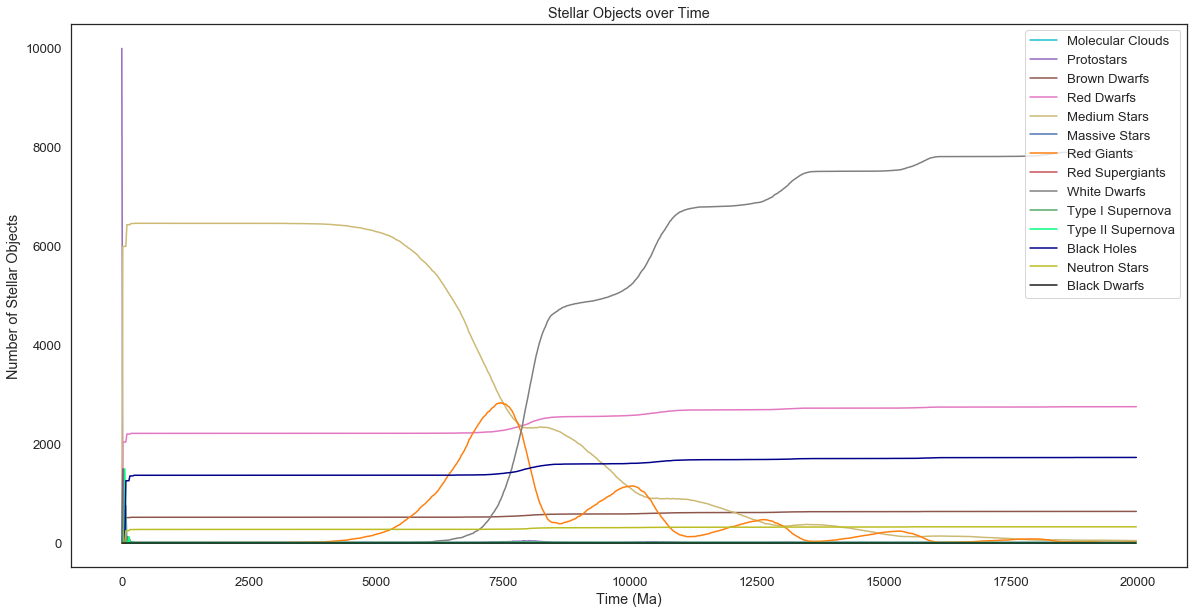

In [48]:
# This is the final function used to run the simulation.  It takes several parameters.
# The first is a state object with a list of the beginning stellar objects.
# The second is a state object with a list of parameters which the simulation uses to run.  e.g., the expected lifespan of a star
# The third is the timespan for which the simulation covers, in millions of years
# The fourth is the timespan each iteration will cover.  Decrease for higher resolution, increase for faster runtime
# There are also options for log scaling (called 'xlog' and 'ylog'), which are false by default


galaxy, parameters = make_galaxy()
simulate(galaxy, parameters, 20000, 20)


#### Did you like the loading bar?

### Above, we can see that over 20 billion years, a lot happens in the very beginning we can't see with this timeframe, some objects persist from the beginning to the end, and there's an interesting association between Medium Stars, Red Giants, and White Dwarfs.

### Medium stars give rise to Red Giants, which burn out into White Dwarfs; but notice there are wave like forms within.  Those variations are due to material from the Red Giants recycling back into Molecular Clouds, some of which evolve back again.  However, White Dwarfs do accumulate over time (which is what is believed will happen in reality), without having time here to evolve into Black Dwarfs.

### We also see a bunch of Red Dwarfs, Black Holes, Brown Dwarfs, and Neutron Stars form right away, and then stay pretty constant aside from a few additions along the way as Red Giants give rise to more Molecular Clouds, beginning the cycle again.  



# A Note on Validity

### It's hard to validate things that have never happened (or were never observed on the scale we're simulating here).  But, the objective of this simulation is to provide a way employ theories about the behavior of stars and other stellar objects, and simulate what happens.  Thus, the theories regarding stellar evolution directly drive the simulation.  

### The default parameters I've programmed into the simulation (such as life expectancies) come from either theories that I've found or were my best guesses.  

### However, the simulations do provide seemingly reasonable results.  None the less, take the results with a grain of salt.




# Let's take a look at a shorter, earlier timeframe

#### We do need to run it again though, to get an appropriate resolution


This simulation will run 10000.0 iterations.  If it's taking too long, reduce the timespan or increase the time increment


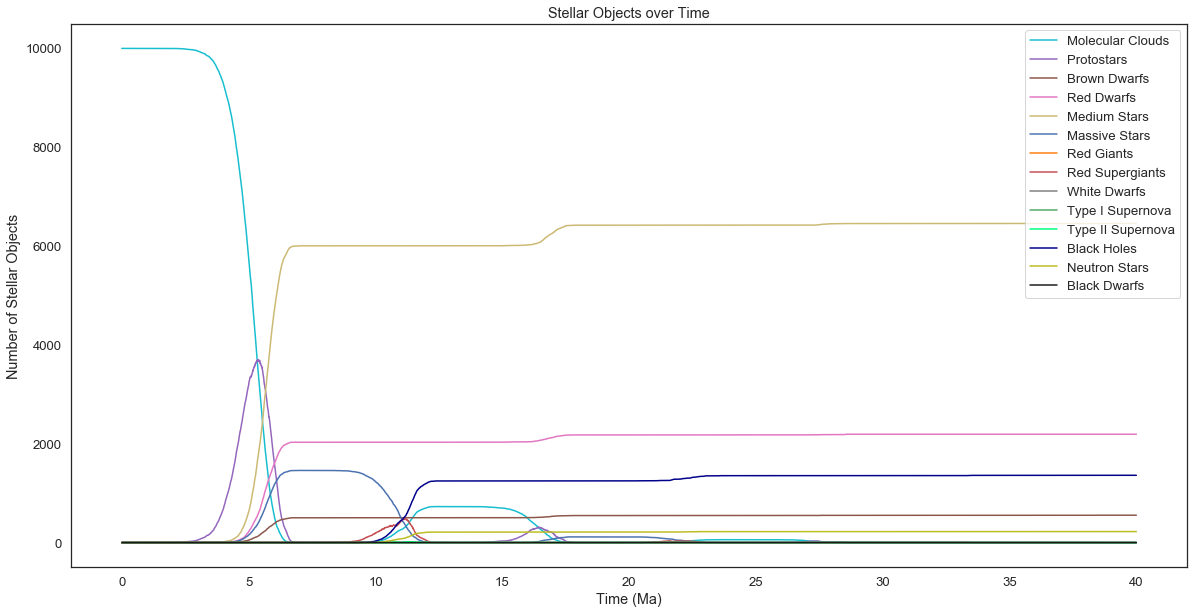

In [53]:
galaxy, parameters = make_galaxy()  #Refresh the origional settings
simulate(galaxy, parameters, 40, 0.004)

### Here We can see that the starting Molecular Clouds quickly form Protostars, which then evolve into Medium Stars, Brown Dwarfs, Red Dwarfs, and Massive Stars; all but the Massive Stars persist throughout this timeframe.  The Massive Stars then go on to form Red Giants, which quickly result in Type II Supernova, yielding Black Holes and Neutron Stars, and also more Molecular Clouds which begin the cycle again.

### However, there's a lot going on between about 8 and 13 Ma; let's get an even closer look by quickly running the simulation to 8 Ma, and then running it again until 13 Ma.

This simulation will run 10000.0 iterations.  If it's taking too long, reduce the timespan or increase the time increment


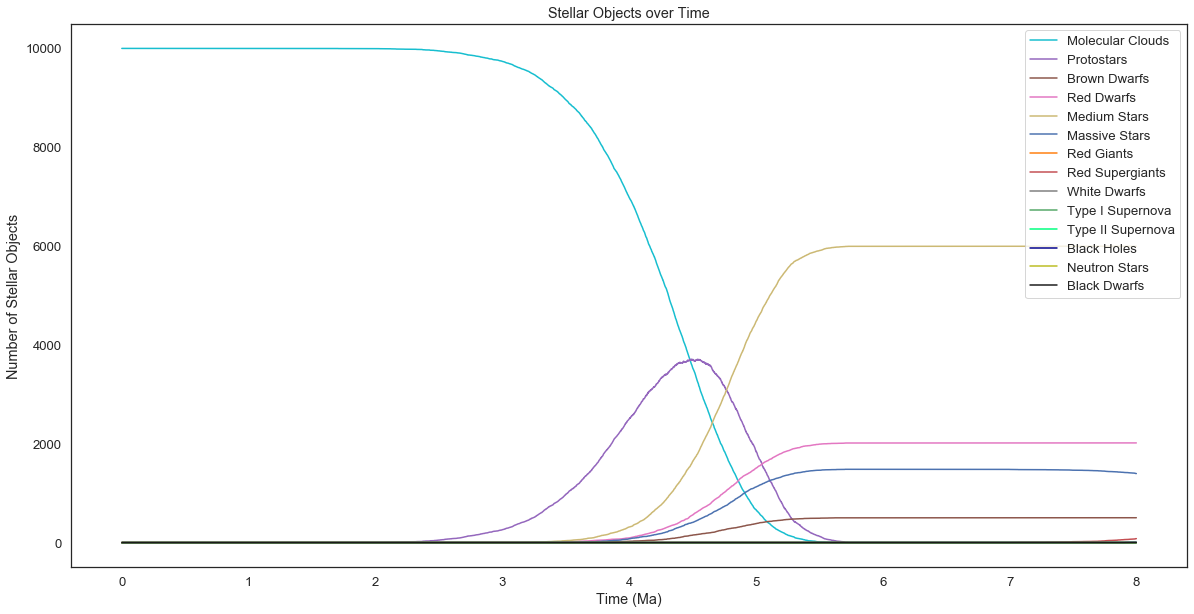

This simulation will run 1000.0 iterations.  If it's taking too long, reduce the timespan or increase the time increment


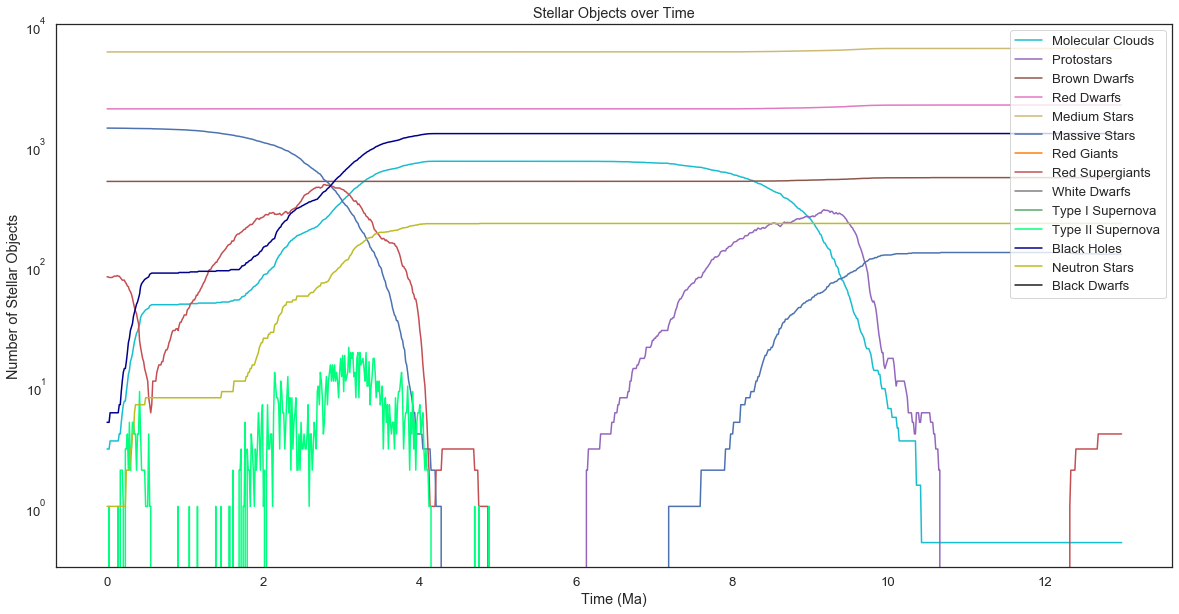

In [57]:
galaxy, parameters = make_galaxy()  #Refresh the origional settings

simulate(galaxy, parameters, 8, 0.0008) 
simulate(galaxy, parameters, 13, 0.013, ylog = True)

### Above in the second figure, we can see what happens when Massive Stars begin to die (the figure uses log scale now for the y component).  They form Red Supergiants which quickly die, resulting in Type II Supernovae.  These supernovae then form either Neutron Stars, or Black holes, along with some Molecular Cloud that goes on to later form more Protostars (which you can see happening towards the tail of the figure).


# Now Let's Take a Look at the Long Term

### What's going to happen to a galaxy over a very long timeframe? 
### We'll run the simulation over 20 trillion years this time.  A lot longer than before.


This simulation will run 1000.0 iterations.  If it's taking too long, reduce the timespan or increase the time increment


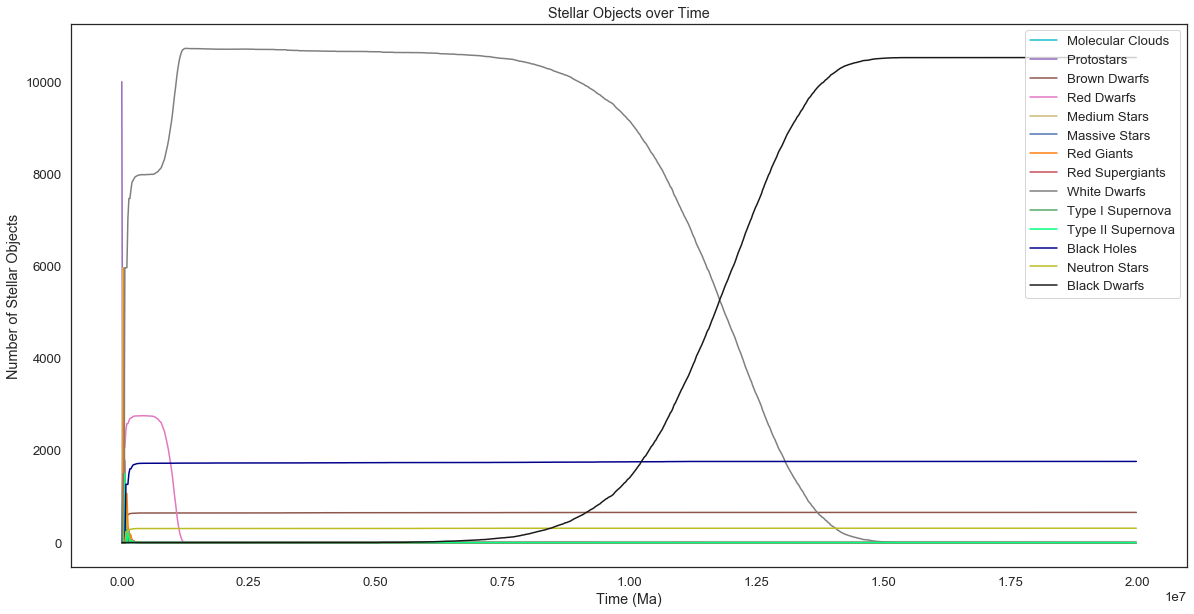

In [62]:
galaxy, parameters = make_galaxy()  #Refresh the origional settings

simulate(galaxy, parameters, 20000000, 20000)
# Note: It takes longer to run these with longer timeframes

### What we see here is a lot of activity while this galaxy is still younger than about 250 billion years, afterwards it's pretty much all Black Holes, Neutron Stars, Brown Dwarfs, and White Dwarfs, which occasionally collide forming Type I Supernovae, recycling back into the system.  By about 15 trillion years however, the White Dwarfs have become Black Dwarfs, and the galaxy pretty much stays the same.

### We further analyze leftover state objects ('galaxy') to get some more information.  Let's see what the final composition ended up as.


Text(0.5, 1.0, 'Final Glactic Makeup')

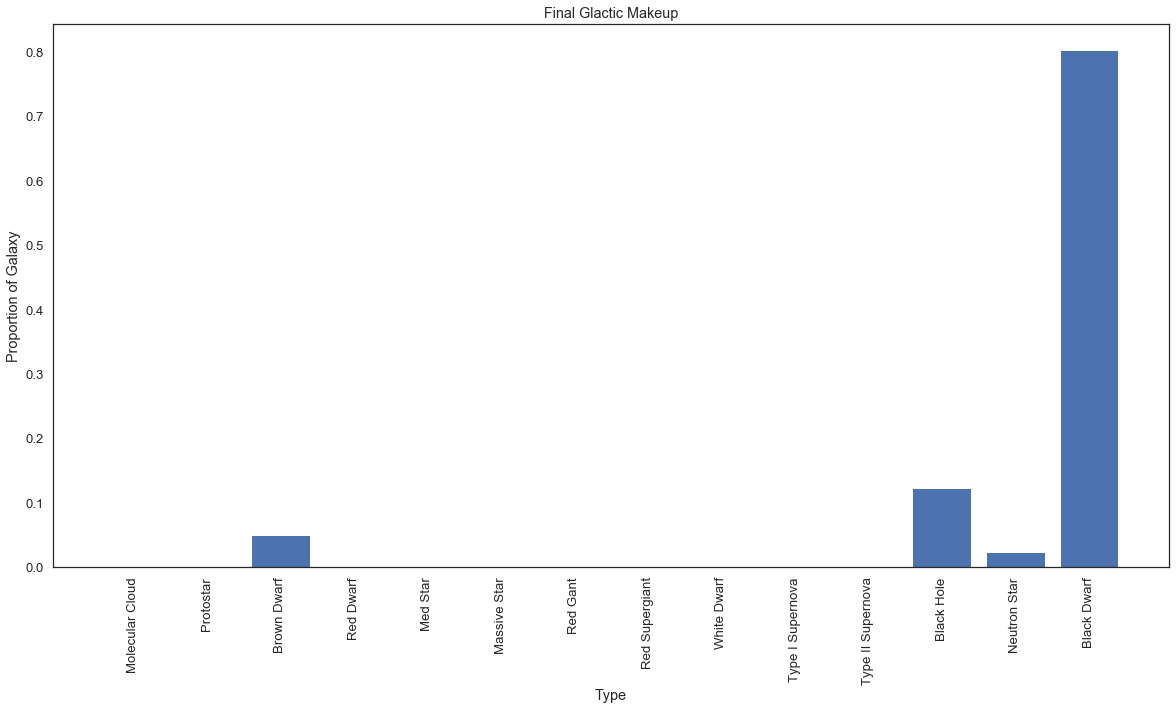

In [59]:
values = []
names = "Molecular Cloud", "Protostar", "Brown Dwarf", "Red Dwarf", "Med Star", "Massive Star", "Red Gant", "Red Supergiant", "White Dwarf", "Type I Supernova", "Type II Supernova", "Black Hole", "Neutron Star", "Black Dwarf"
for i in range(14):
    values.append(galaxy[i])

plt.bar(names, values/sum(galaxy[0:14]))
plt.xlabel('Type')
plt.xticks(rotation='vertical')
plt.ylabel('Proportion of Galaxy')
plt.title('Final Glactic Makeup')

### It's mostly Black Dwarves left.  This makes theoretical sense, as White Dwarfs are a very common evolutionary product of the possible evolutionary tracks, and they will eventually cool down enough to be considered Black Dwarfs.  This is still speculation; White Dwarfs are expected to cool over trillions of years, while the universe is only 13.8 billion years old.  However, it does go to validate the model somewhat as it aligns with current astronomical theory.


# What were the Products Along the Way?

### Built into the galaxy object are cumulative counts for each object, which show how many of each were formed in total.  Let's see what the most common objects were.


Text(0.5, 1.0, 'Final Glactic Makeup')

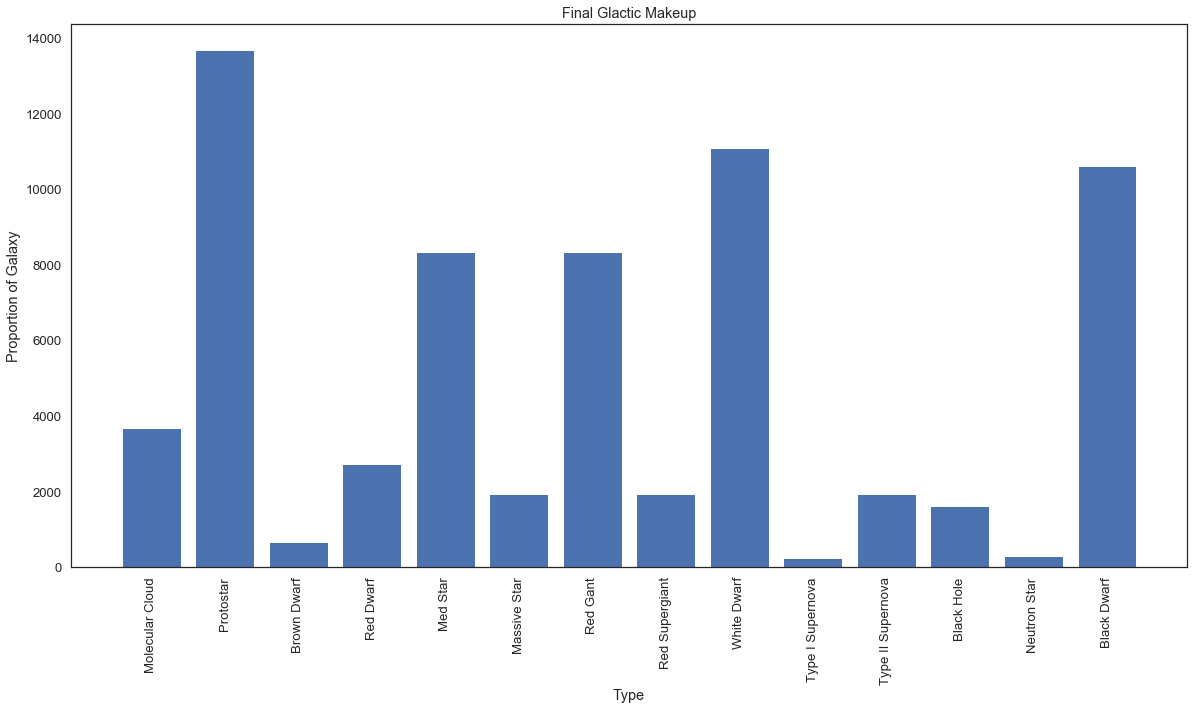

In [60]:
values = []
names = "Molecular Cloud", "Protostar", "Brown Dwarf", "Red Dwarf", "Med Star", "Massive Star", "Red Gant", "Red Supergiant", "White Dwarf", "Type I Supernova", "Type II Supernova", "Black Hole", "Neutron Star", "Black Dwarf"
for i in range(14,28):
    values.append(galaxy[i])

plt.bar(names, values)
plt.xlabel('Type')
plt.xticks(rotation='vertical')
plt.ylabel('Proportion of Galaxy')
plt.title('Final Glactic Makeup')

### As one might expect Protosars were the most commonly formed object (they are the precursor to all but Molecular Cloud, which we started with).  White Dwarves were the second most common, most of which became Black Dwarfs except for those that formed Type I Supernovae.  Medium Stars and Red Giants were also common, and formed at the same proportion because Medium Stars always go on to form Red Giants (same thing for Massive Stars and Red Supergiants).  



# What Happens if we Change Some Parameters

### As previously mentioned, this simulation was designed to be flexible.  For example, let's change or theory of how often Type I Supernovae occur, and see what happens over the long term (20 trillion years)

This simulation will run 1000.0 iterations.  If it's taking too long, reduce the timespan or increase the time increment


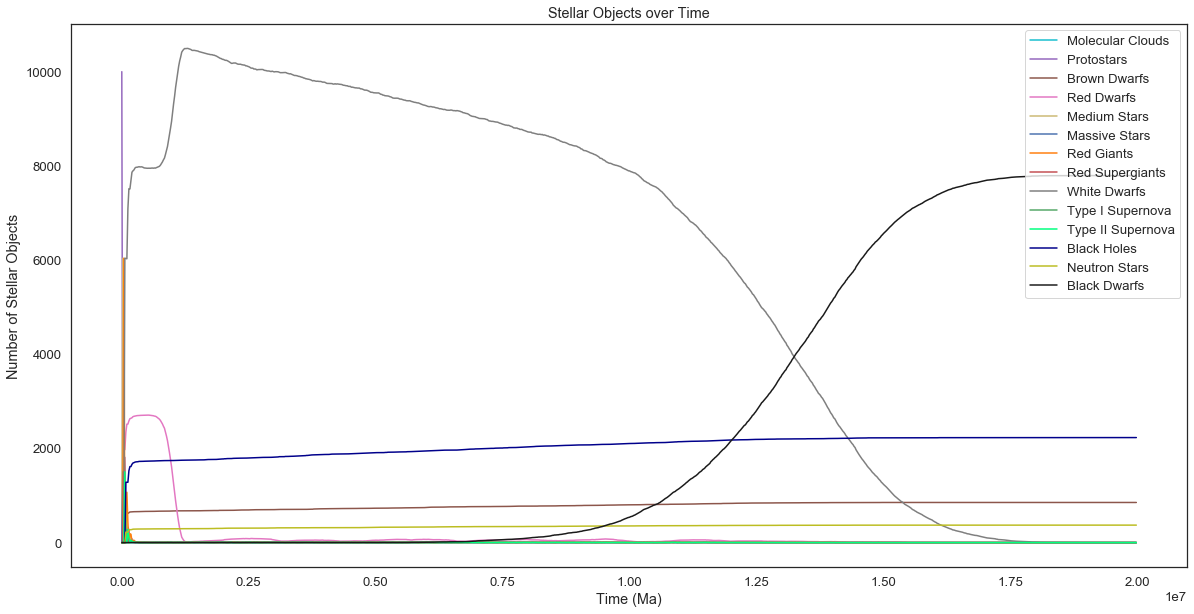

In [63]:
galaxy, parameters = make_galaxy()  #Refresh the origional settings

#This will change the parameter regaurding a White Dwarf's proclivity for Type I Supernovae
parameters.p_white_dwarf_collision = 0.5 # This was 0.04 before.  Now it has a 50% chance of forming a Type I Supernova over it's lifetime

simulate(galaxy, parameters, 20000000, 20000)

### We can see that White Dwarfs form many more Type I Supernovae, resulting in a feedback loop which eventually recycles back into a higher proportion of Black Holes, Neutron Stars, and Brown Dwarfs, and a lower proportion of Black Dwarfs by the end of the simulation.  Also, many of the secondary White Dwarves that formed from 'recycled' material from Type I Supernovae persisted until the end of the simulation this time.

# Conclusions

### This simulation allows us to simulate stellar evolution, with any number of different starting conditions, over varying timeframes, and with configurable parameters regarding the processes within.\

### The progression of stellar evolution that I've suggested (see the flowchart) is a reasonable simplification for these purposes, but could be further detailed.  It does have a major problem: the timeframe will change depending on the number of iterations, because more iterations grant a higher cumulative probability of an event occurring.  I have not yet found a full solution to this.  A function determining collisions and collision results between objects would also be useful; I attempted to implement such, but it was too computer intensive to keep.  Also, more research could be put into finding parameters to run the simulation with.  It would also be beneficial to program into the simulation the option to output different figures or statistics.  

### Overall, I'm fairly happy with how this turned out, and will further improve it in the future.
